<a href="https://colab.research.google.com/github/vn322/Sport-University/blob/main/rbnlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Объединяет actions_1 и actions_2 в общий корпус текста.
Извлекает униграммы, биграммы и триграммы.
Сопоставляет их с оценками из results_1 и results_2.
Находит наиболее часто встречаемые и наиболее высоко оцениваемые n-граммы.
Строит граф наиболее частых связей с весами на рёбрах, отражающими силу связи (например, среднюю оценку или частоту).

# подготовка

In [1]:
import numpy as np
import pandas as pd
#import seaborn as sns
#import matplotlib
#import matplotlib.pyplot as plt

In [66]:
df_act= pd.read_excel('https://github.com/vn322/Sport-University/raw/refs/heads/main/combat/db25.xlsx', sheet_name= 1)
df_act.head(3)

,fighter1,fighter2,stage,start_ep,end_ep,attacker,actions_1,actions_2,results_1,results_2
0,ilkvl0198,karma0692,четвертьфинал,04:47:00,04:48:00,1,алнбк,алрпг,1,0
1,ilkvl0198,karma0692,четвертьфинал,04:31:00,04:30:00,2,бл,апрпк,0,0
2,ilkvl0198,karma0692,четвертьфинал,04:28:00,04:26:00,2,апрбг,"апрпг, апрпг, алрпг",1,"1,0,0"


# Подготовка данных

In [67]:
df_act['results_1'] = df_act['results_1'].astype(str)
df_act['sum_1'] = df_act['results_1'].apply(
    lambda x: sum(float(i) for i in x.split(',') if i.strip().isdigit()) if pd.notna(x) else 0
)

In [68]:
df_act['results_2'] = df_act['results_2'].astype(str)
df_act['sum_2'] = df_act['results_2'].apply(
    lambda x: sum(float(i) for i in x.split(',') if i.strip().isdigit()) if pd.notna(x) else 0
)

In [ ]:
df_act.columns

Index(['fighter1', 'fighter2', 'stage', 'start_ep', 'end_ep', 'attacker',
       'actions_1', 'actions_2', 'results_1', 'results_2', 'sum_1', 'sum_2'],
      dtype='object')

In [27]:
df_act['sum_1'].unique()

array([1., 0., 6., 4., 2., 9., 3., 5., 7.])

In [6]:
df_act['results_1'].unique()

array(['1', '0', '0.2', '0,0', '0,1', '0,0,1', '0,0.2', '1,0', '0,0,0',
       '0,0,1,0,0.2', '0,0,1,0,0', '0,1, 5', '1,1,2', '0,2', '2,1,1',
       '1,0,1,2,5', '1,2', '5', '0,1,2', '0,1,0,0', '1,1', '0,1,1',
       '1,0,0,0,1', '0,0,1,0', '1,1,0,1', '0,0,0,0', '0,0,', '1,0,0,0',
       'nan', '2.2', '1,5', '1,0,0', '2', '0, 1, 0.2', '2, 5', '0,2,0',
       '1.2', '0,1,5', '2,5', '1,0,1', '1,1,0'], dtype=object)

# граммы

In [ ]:
 #!pip install nltk  # раскомментировать, если нужно

In [69]:
df = df_act.copy()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


===  Топ-10 униграмм ===
ппб: 107
апрпг: 95
бл: 81
алрпг: 69
апнбк: 49
апрбг: 48
алнбк: 45
алрбг: 43
зон: 41
апнпк: 37
===  Топ-10 биграмм ===
алрпг: 17
апрпг: 16
ппб: 15
зот: 13
апрпг: 12
апрпг: 12
ппб: 10
бл: 10
бл: 9
ппб: 9
===  Топ-10 триграмм ===
апрпг: 6
алрпг: 6
ппб: 4
апрпг: 3
ппб: 3
ппб: 3
апрбг: 3
алрпг: 3
алрбг: 3
ппб: 3

=== Высоко оценённые: Топ-10 биграмм ===
ппб ппуд: 4
апрбг ппб: 3
алрпг апрпг: 3
апрпг ппб: 2
ппуд ппудпр: 2
алрпг алрпг: 2
ппб апрпг: 1
ппб бл: 1
бл кабр: 1
кабр ппуд: 1

=== Высоко оценённые: Топ-10 триграмм ===
ппб ппуд ппудпр: 2
апрпг ппб апрпг: 1
ппб апрпг ппб: 1
апрпг ппб бл: 1
ппб бл кабр: 1
бл кабр ппуд: 1
кабр ппуд апрпк: 1
ппуд апрпк ппб: 1
апрпк ппб ппуд: 1
ппб ппуд апрбг: 1


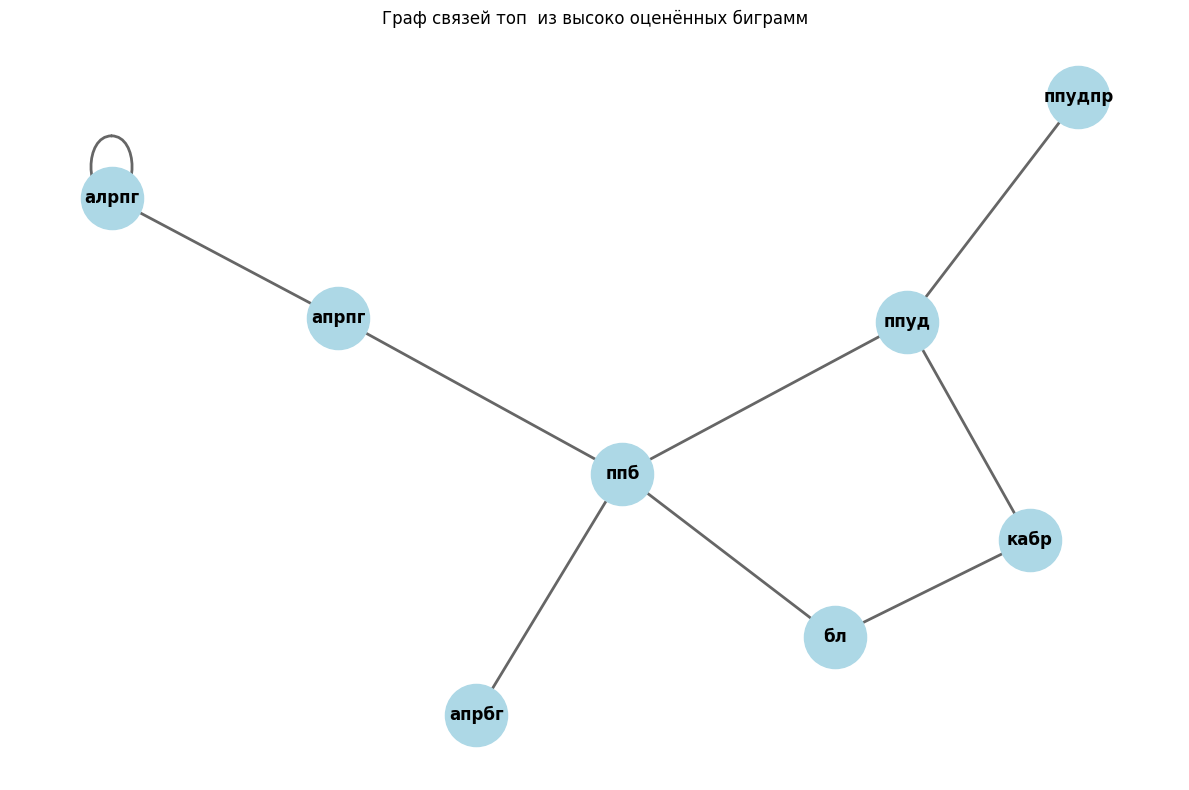

In [29]:
import pandas as pd
import nltk
nltk.download('punkt_tab')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from collections import Counter
import string
import matplotlib.pyplot as plt
import networkx as nx

# Загрузка ресурсов NLTK (выполняется один раз)
try:
    nltk.data.find('tokenizers/punkt')
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('punkt')
    nltk.download('stopwords')

# Предположим, что df уже загружен
# Пример: df = pd.read_csv('your_data.csv')

# Объединяем реплики и их оценки
all_texts = []
high_score_texts = []

# Порог для "высоко оценённых" — например, оценка >= 2
THRESHOLD = 2

for _, row in df.iterrows():
    text1 = str(row['actions_1'])
    text2 = str(row['actions_2'])
    score1 = row['sum_1']
    score2 = row['sum_2']

    all_texts.append(text1)
    all_texts.append(text2)

    if score1 >= THRESHOLD:
        high_score_texts.append(text1)
    if score2 >= THRESHOLD:
        high_score_texts.append(text2)

# Функция предобработки текста
def preprocess(text):
    # Приведение к нижнему регистру
    text = text.lower()
    # Удаление знаков препинания
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Токенизация
    tokens = word_tokenize(text, language='russian')
    # Удаление стоп-слов (опционально)
    stop_words = set(stopwords.words('russian'))
    tokens = [word for word in tokens if word not in stop_words and word.isalpha()]
    return tokens

# Обработка всех текстов
all_tokens = []
for text in all_texts:
    all_tokens.extend(preprocess(text))

# Обработка высоко оценённых текстов
high_tokens = []
for text in high_score_texts:
    high_tokens.extend(preprocess(text))

# Функция для получения n-грамм и их частот
def get_ngram_freq(tokens, n, top_k=10):
    n_grams = list(ngrams(tokens, n))
    return Counter(n_grams).most_common(top_k)

# Получаем частоты
unigrams_all = get_ngram_freq(all_tokens, 1, 10)
bigrams_all = get_ngram_freq(all_tokens, 2, 10)
trigrams_all = get_ngram_freq(all_tokens, 3, 10)

unigrams_high = get_ngram_freq(high_tokens, 1, 10)
bigrams_high = get_ngram_freq(high_tokens, 2, 10)
trigrams_high = get_ngram_freq(high_tokens, 3, 10)

# Вывод результатов
print("===  Топ-10 униграмм ===")
for gram, freq in unigrams_all:
    print(f"{gram[0]}: {freq}")

print("===  Топ-10 биграмм ===")
for gram, freq in bigrams_all:
    print(f"{gram[0]}: {freq}")

print("===  Топ-10 триграмм ===")
for gram, freq in trigrams_all:
    print(f"{gram[0]}: {freq}")



print("\n=== Высоко оценённые: Топ-10 биграмм ===")
for gram, freq in bigrams_high:
    print(f"{' '.join(gram)}: {freq}")

print("\n=== Высоко оценённые: Топ-10 триграмм ===")
for gram, freq in trigrams_high:
    print(f"{' '.join(gram)}: {freq}")


# --- Построение графа связей для топ-биграмм из высоко оценённых реплик ---
top_bigrams = [gram for gram, _ in bigrams_high]

G = nx.Graph()

for w1, w2 in top_bigrams:
    G.add_edge(w1, w2)

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5, seed=42)
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='lightblue')
nx.draw_networkx_edges(G, pos, width=2, alpha=0.6)
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')
plt.title("Граф связей топ  из высоко оценённых биграмм")
plt.axis('off')
plt.tight_layout()
plt.show()

In [10]:
trigrams_all

[(('апрпг', 'алрпг', 'апрпг'), 5),
 (('алрпг', 'апрпг', 'алрпг'), 5),
 (('ппб', 'зот', 'ппб'), 4),
 (('апрпг', 'алрпг', 'ппб'), 3),
 (('ппб', 'зот', 'апнпк'), 3),
 (('ппб', 'бл', 'алнбк'), 3),
 (('апрбг', 'алрбг', 'бл'), 3),
 (('алрпг', 'апрпг', 'апнбк'), 3),
 (('алрбг', 'апрбг', 'алрбг'), 3),
 (('ппб', 'алрпг', 'апрпг'), 3)]

# оценки

In [11]:
#!pip install plotly networkx matplotlib nltk -q
import pandas as pd
import numpy as np
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams
import networkx as nx
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objects as go

nltk.download('stopwords', quiet=True)
stop_words = set(stopwords.words('russian'))

 особенности:

Нет оценок → заменяем на 0.
Если оценок меньше, чем слов в тексте → заполняем недостающие нулями.
Если оценок больше, чем слов → обрезаем по количеству слов.
Текст может содержать нестандартные токены вроде "апрпг" — оставляем их как есть (не фильтруем по длине/языку).
Каждое слово в высказывании сопоставляется со своей оценкой — а не со средней по всей реплике.
Это важно: ранее мы усредняли оценку по всей реплике для всех n-грамм. Теперь будем использовать позиционное сопоставление:

actions = "a,b,c" → токены: ["a", "b", "c"]
results = "0,1,0" → оценки: [0, 1, 0]
Тогда слово "b" получает оценку 1, а "a" и "c" — 0.
Такой подход точнее отражает локальную оценку каждого токена.

# Функция обработки одной колонки

In [36]:
def align_texts_and_scores(text_col, score_col):
    """
    Принимает pd.Series с текстами и оценками.
    Возвращает список списков токенов и оценок той же длины.
    """
    tokens_list = []
    scores_list = []

    for text, scores_str in zip(text_col, score_col):
        # Обработка текста
        if pd.isna(text) or str(text).strip() == "":
            tokens = []
        else:
            tokens = [t.strip() for t in str(text).split(',') if t.strip() != ""]

        # Обработка оценок
        if pd.isna(scores_str) or str(scores_str).strip() == "":
            score_vals = []
        else:
            try:
                score_vals = [float(x.strip()) for x in str(scores_str).split(',') if x.strip() != ""]
            except ValueError:
                score_vals = [0.0] * len(tokens)

        # Выравнивание длины
        n = len(tokens)
        if len(score_vals) < n:
            score_vals += [0.0] * (n - len(score_vals))
        elif len(score_vals) > n:
            score_vals = score_vals[:n]
        else:
            pass  # равны

        tokens_list.append(tokens)
        scores_list.append(score_vals)
    return tokens_list, scores_list

# Объединение данных обоих

In [37]:
tokens1, scores1 = align_texts_and_scores(df['actions_1'], df['results_1'])
tokens2, scores2 = align_texts_and_scores(df['actions_2'], df['results_2'])

all_tokens = tokens1 + tokens2
all_scores = scores1 + scores2

# Сбор n-грамм с привязкой к оценкам
Теперь каждая n-грамма получает оценку как среднее от оценок её токенов.

In [38]:
all_ngram_scores = []

for tokens, scores in zip(all_tokens, all_scores):
    if not tokens:
        continue

    # Генерация n-грамм
    unigrams = [(tokens[i], scores[i]) for i in range(len(tokens))]
    bigrams = [( (tokens[i], tokens[i+1]), (scores[i] + scores[i+1]) / 2 )
               for i in range(len(tokens) - 1)]
    trigrams = [( (tokens[i], tokens[i+1], tokens[i+2]),
                  (scores[i] + scores[i+1] + scores[i+2]) / 3 )
                for i in range(len(tokens) - 2)]

    # Преобразуем в строки
    for gram, score in unigrams:
        all_ngram_scores.append((gram, score))
    for gram, score in bigrams:
        all_ngram_scores.append((' '.join(gram), score))
    for gram, score in trigrams:
        all_ngram_scores.append((' '.join(gram), score))

# Частота и средние оценки

In [16]:
# Частота
ngram_freq = Counter([ngram for ngram, score in all_ngram_scores])

# Агрегация оценок
from collections import defaultdict
score_dict = defaultdict(list)
for ngram, score in all_ngram_scores:
    score_dict[ngram].append(score)

ngram_avg_score = {ngram: np.mean(scores) for ngram, scores in score_dict.items()}

# Топы

In [39]:
top_freq = ngram_freq.most_common(10)
top_scored = sorted(ngram_avg_score.items(), key=lambda x: x[1], reverse=True)[:10]

print("Наиболее частые n-граммы:")
for gram, freq in top_freq:
    print(f"  '{gram}': {freq}")

print("\nНаиболее высоко оцениваемые n-граммы:")
for gram, avg in top_scored:
    print(f"  '{gram}': {avg:.2f}")

Наиболее частые n-граммы:
  'апрпг': 124
  'ппб': 120
  'бл': 99
  'алрпг': 88
  '-': 85
  'алнбк': 64
  'апнбк': 58
  'алрбг': 55
  'апрбг': 53
  'зон': 44

Наиболее высоко оцениваемые n-граммы:
  '-': nan
  'ппблпр': 5.00
  'алнпг': 5.00
  'ппуд ппблпр': 3.50
  'кабр ппуд': 3.00
  'апрпг алнпг': 3.00
  'ппб ппуд ппудпр': 2.67
  'бл кабр ппуд': 2.00
  'НКД': 2.00
  'НК': 2.00


# Граф связей (только для биграмм и триграмм)

Код масштабируем и работает даже при пустых/некорректных данных.
Оценки не усредняются по реплике, а привязаны к конкретным словам.
Граф строится только по реальным связям между словами, с учётом частоты и оценки.

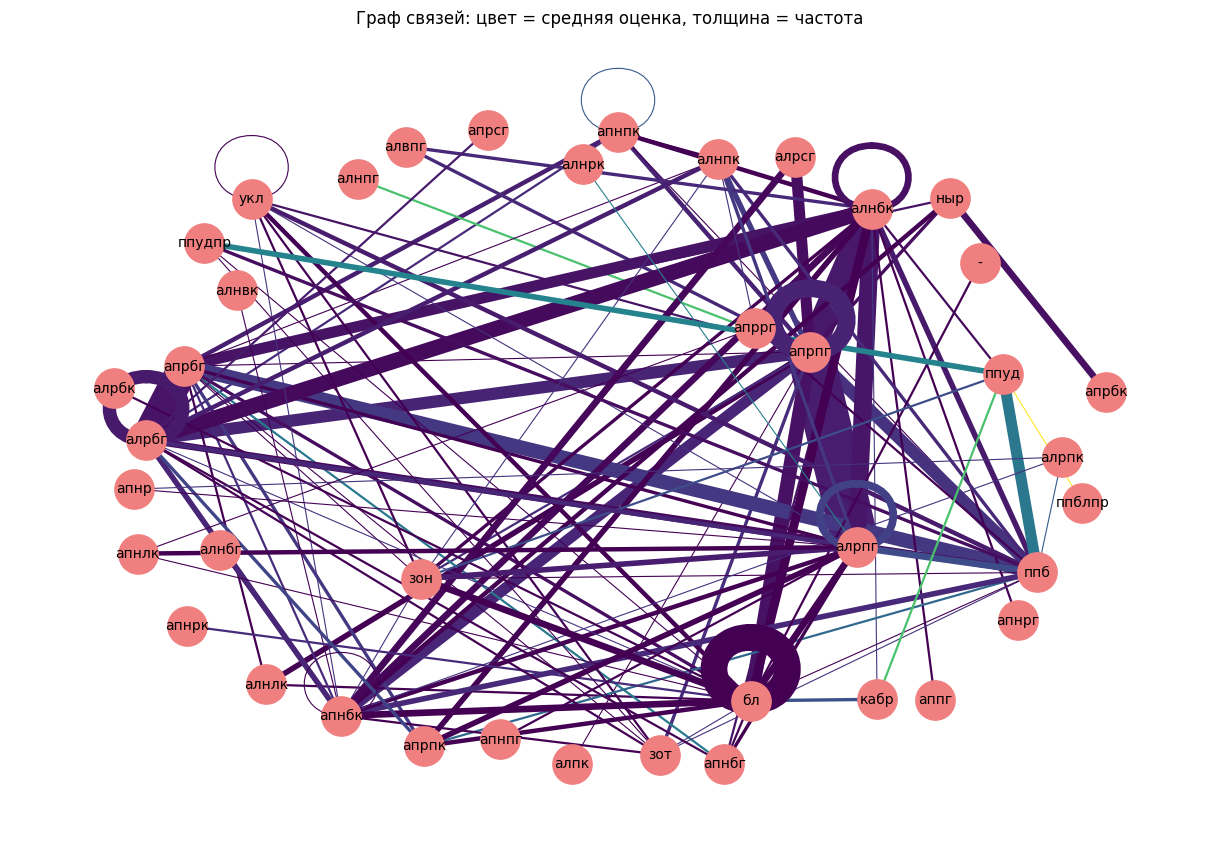

In [40]:
G = nx.Graph()

for ngram, score in all_ngram_scores:
    words = ngram.split()
    if len(words) >= 2:
        for i in range(len(words) - 1):
            u, v = words[i], words[i+1]
            if G.has_edge(u, v):
                # Средневзвешенное обновление
                old_weight = G[u][v]['weight']
                old_count = G[u][v]['count']
                new_count = old_count + 1
                new_weight = (old_weight * old_count + score) / new_count
                G[u][v]['weight'] = new_weight
                G[u][v]['count'] = new_count
            else:
                G.add_edge(u, v, weight=score, count=1)

# Удаление изолятов
G.remove_nodes_from(list(nx.isolates(G)))

if len(G.nodes) > 0:
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, k=2, seed=42)

    edges = G.edges(data=True)
    weights = [d['weight'] for u, v, d in edges]
    widths = [d['count'] for u, v, d in edges]  # толщина = частота связи

    nx.draw(
        G, pos,
        with_labels=True,
        node_size=800,
        node_color='lightcoral',
        font_size=10,
        edge_color=weights,
        width=[w*0.8 for w in widths],
        edge_cmap=plt.cm.viridis,
        edge_vmin=min(weights) if weights else 0,
        edge_vmax=max(weights) if weights else 1
    )
    plt.title("Граф связей: цвет = средняя оценка, толщина = частота")
    plt.show()
else:
    print("Недостаточно данных для построения графа.")

In [20]:
df['results_1'].unique()

array(['1', '0', '0.2', '0,0', '0,1', '0,0,1', '0,0.2', '1,0', '0,0,0',
       '0,0,1,0,0.2', '0,0,1,0,0', '0,1, 5', '1,1,2', '0,2', '2,1,1',
       '1,0,1,2,5', '1,2', '5', '0,1,2', '0,1,0,0', '1,1', '0,1,1',
       '1,0,0,0,1', '0,0,1,0', '1,1,0,1', '0,0,0,0', '0,0,', '1,0,0,0',
       'nan', '2.2', '1,5', '1,0,0', '2', '0, 1, 0.2', '2, 5', '0,2,0',
       '1.2', '0,1,5', '2,5', '1,0,1', '1,1,0'], dtype=object)

In [35]:
df['actions_2'].unique()

array(['алрпг', 'апрпк', 'апрпг, апрпг, алрпг', 'зот', 'бл, алнлк',
       'алрпг, ппб', 'алнбк', 'алрбг', 'зон, апрбг', 'кабр', nan, 'алнпк',
       'апрпг, апрбг', 'апрпг ', 'апрпг, алрбг', 'алрпг, апрбг, алрбг',
       'ппб', 'бл', 'апрпг,алрбг', 'апрбг', 'апрпг, алрсг', 'укл, ппб',
       'апнпк', 'алнлк', 'апрпг', '-', 'алнбк, алрпг', 'зон, ппб',
       'зот, апрпг, алнбк, апнбк', 'ппуд', 'бл, апрпг, алнбк', 'укл',
       'апрпг, ппб', 'алрпг,апрпг,алнбк,апрпг,ппб', 'бл, алрбг',
       'бл, апрпг, апнбк', 'зон, апрпг, ппб', 'зон', 'апрпг, алнбк',
       'зот, алрбг, ппб', 'апнбк', 'алрбг, апнбк', 'апрбг, ппб',
       'апрбг, бл', 'бл, апрбг, алрбг', 'алнбк, ппб',
       'алнбк, алрбг, апрбг, алрбг', 'апнр', 'бл, ппб',
       'алрбг, апрбг, алнбк, апнбк', 'зон, алнбк', 'алрпг, алрбг, алрбг',
       'алрпк', 'апнбк, ппб', 'апнрк', 'алрпг, апнр',
       'алрпг, алрбг, апрбг, алнбк, алрбг,апрбг', 'алнбк, кабр', 'апрсг',
       'апрбг, зот', 'алрбг, апрсг', 'апрсг, алрбг',
       'апнр

Эти подходы позволяют:

понять, что работает в диалоге,
выявить поведенческие паттерны,
построить базовые модели предсказания,
визуализировать динамику и связи.

# 1. Анализ полярности высказываний
Какие фразы чаще получают высокие/низкие оценки — и есть ли устойчивые "шаблоны успеха"?

 словарь "успешных" и "неудачных" n-грамм, а затем использовать его для предсказания оценки новой реплики.

In [43]:
# Построим топ-10 "успешных" и "неудачных" биграмм
threshold = 3.0  # порог "успеха", если шкала 0–5

successful = {gram: score for gram, score in ngram_avg_score.items() if score >= threshold}
unsuccessful = {gram: score for gram, score in ngram_avg_score.items() if score < threshold}

print("Успешные биграммы/триграммы:", sorted(successful.items(), key=lambda x: -x[1])[:5])
print("Неудачные:", sorted(unsuccessful.items(), key=lambda x: x[1])[:5])

Успешные биграммы/триграммы: [('ппблпр', np.float64(5.0)), ('алнпг', np.float64(5.0)), ('ппуд ппблпр', np.float64(3.5)), ('кабр ппуд', np.float64(3.0)), ('апрпг алнпг', np.float64(3.0))]
Неудачные: [('апнпк апрпг', np.float64(0.0)), ('ппбп', np.float64(0.0)), ('алнлк апрбг', np.float64(0.0)), ('апнпк апрбг', np.float64(0.0)), ('алнбг', np.float64(0.0))]


# 2. Сравнение стилей собеседников
Один ли из участников чаще получает высокие оценки? Использует ли он другие слова?


Раздельный анализ actions_1 vs actions_2 → сравнение частот и средних оценок.

In [45]:
def get_ngram_stats(tokens_list, scores_list):
    ngrams_scores = []
    for tokens, scores in zip(tokens_list, scores_list):
        for i in range(len(tokens)):
            ngrams_scores.append((tokens[i], scores[i]))
        for i in range(len(tokens)-1):
            ngrams_scores.append((' '.join(tokens[i:i+2]), (scores[i]+scores[i+1])/2))
    freq = Counter([g for g, _ in ngrams_scores])
    avg_score = {g: np.mean([s for gg, s in ngrams_scores if gg == g]) for g in freq}
    return freq, avg_score

freq1, score1 = get_ngram_stats(tokens1, scores1)
freq2, score2 = get_ngram_stats(tokens2, scores2)

# Пример: кто чаще использует слово "ок"?
word = "апрпг"
print(f"'{word}' — собеседник 1: {freq1.get(word, 0)} раз, ср. оценка: {score1.get(word, 0):.2f}")
print(f"'{word}' — собеседник 2: {freq2.get(word, 0)} раз, ср. оценка: {score2.get(word, 0):.2f}")

'апрпг' — собеседник 1: 61 раз, ср. оценка: 0.44
'апрпг' — собеседник 2: 63 раз, ср. оценка: 0.38


# 3. Контекстные цепочки: "если A, то B"
Какие фразы следуют за высоко оценёнными? Есть ли поведенческие паттерны?


Построить граф переходов между репликами с весами = оценка следующей реплики.

In [51]:
prev_next_scores = []

for idx in range(len(df) - 1):
    # Безопасное извлечение текста
    curr_1 = str(df.loc[idx, 'actions_1']) if pd.notna(df.loc[idx, 'actions_1']) else ""
    curr_2 = str(df.loc[idx, 'actions_2']) if pd.notna(df.loc[idx, 'actions_2']) else ""

    # Следующие оценки
    next_scores_1 = df.loc[idx + 1, 'results_1']
    next_scores_2 = df.loc[idx + 1, 'results_2']

    # Сбор всех числовых оценок из следующего хода
    next_scores = []
    for r in [next_scores_1, next_scores_2]:
        if pd.notna(r) and str(r).strip() != "":
            try:
                next_scores.extend([float(x.strip()) for x in str(r).split(',') if x.strip() != ""])
            except ValueError:
                continue  # игнорируем некорректные значения

    # Средняя оценка следующего хода
    next_avg = np.mean(next_scores) if next_scores else 0.0

    # Формируем контекст
    context = f"{curr_1} || {curr_2}".strip(" ||")
    prev_next_scores.append((context, next_avg))

# Вывод топ-5 контекстов
top_contexts = sorted(prev_next_scores, key=lambda x: -x[1])[:5]
print("Контексты, после которых идут высокие оценки:")
for ctx, score in top_contexts:
    print(f"→ {ctx[:60]}... → оценка {score:.2f}")

Контексты, после которых идут высокие оценки:
→ ппб || апнбк... → оценка 2.50
→ бл || апнрк... → оценка 2.50
→ - || ппб... → оценка 2.33
→ апнбк || -... → оценка 2.33
→ апнбк || бл... → оценка 2.00


# 4. Кластеризация фраз по семантике (даже без эмбеддингов)
Можно ли группировать похожие фразы без BERT?


Использовать n-граммовое пересечение или Jaccard similarity.

In [47]:
from itertools import combinations

def jaccard(a, b):
    set_a, set_b = set(a.split()), set(b.split())
    return len(set_a & set_b) / len(set_a | set_b) if set_a | set_b else 0

# Возьмём все уникальные биграммы
bigrams = [g for g in ngram_freq if ' ' in g and len(g.split()) == 2]

# Найдём похожие пары (Jaccard > 0.5)
similar_pairs = []
for a, b in combinations(bigrams, 2):
    if jaccard(a, b) > 0.5:
        avg_score_a = ngram_avg_score[a]
        avg_score_b = ngram_avg_score[b]
        similar_pairs.append((a, b, avg_score_a, avg_score_b))

print("Похожие биграммы:")
for a, b, sa, sb in similar_pairs[:5]:
    print(f"  '{a}' ({sa:.1f}) ↔ '{b}' ({sb:.1f})")

Похожие биграммы:
  'апнпк апрпг' (0.0) ↔ 'апрпг апнпк' (0.5)
  'алнлк апрбг' (0.0) ↔ 'апрбг алнлк' (0.0)
  'алнбк апрбг' (0.2) ↔ 'апрбг алнбк' (0.2)
  'апнпк апрбг' (0.0) ↔ 'апрбг апнпк' (0.5)
  'апрпг ппб' (0.6) ↔ 'ппб апрпг' (0.0)


# 5. Динамика оценок во времени
Улучшается ли диалог? Падает ли вовлечённость?


Рассчитать скользящее среднее оценок по ходам диалога.

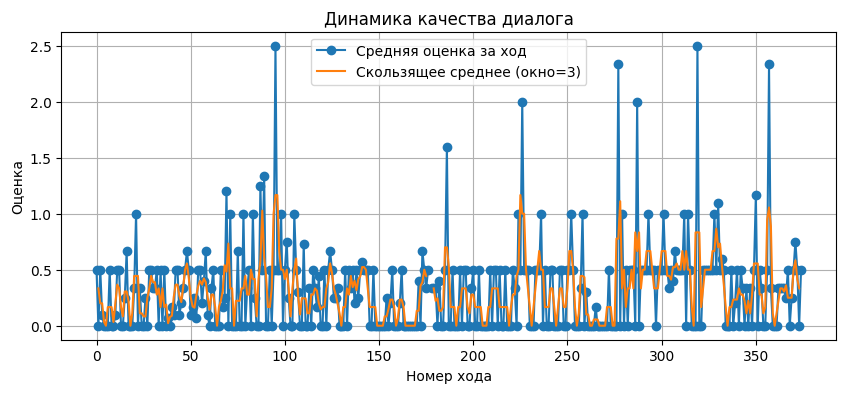

In [48]:
all_turn_scores = []
for r1, r2 in zip(df['results_1'], df['results_2']):
    scores = []
    for r in [r1, r2]:
        if pd.notna(r) and r != "":
            scores.extend([float(x) for x in str(r).split(',') if x.strip() != ""])
    all_turn_scores.append(np.mean(scores) if scores else 0)

df['turn_avg_score'] = all_turn_scores
df['smoothed'] = df['turn_avg_score'].rolling(window=3, center=True).mean()

import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.plot(df.index, df['turn_avg_score'], 'o-', label='Средняя оценка за ход')
plt.plot(df.index, df['smoothed'], '-', label='Скользящее среднее (окно=3)')
plt.xlabel('Номер хода')
plt.ylabel('Оценка')
plt.legend()
plt.title('Динамика качества диалога')
plt.grid(True)
plt.show()

# 6. Предсказание оценки по тексту (baseline модель)
Можно ли предсказать оценку на основе TF-IDF + регрессия?


Собрать корпус → векторизовать → обучить LinearRegression.

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Подготовка данных
texts = []
labels = []
for tokens, scores in zip(all_tokens, all_scores):
    for t, s in zip(tokens, scores):
        texts.append(t)
        labels.append(s)

vectorizer = TfidfVectorizer(analyzer='char_wb', ngram_range=(2,4))  # символьные n-граммы для нон-слов
X = vectorizer.fit_transform(texts)
y = np.array(labels)

# Обучение
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

print(f"Baseline RMSE: {np.sqrt(mean_squared_error(y, y_pred)):.3f}")
print("Пример предсказания:")
for i in range(3):
    print(f"  '{texts[i]}' → истинная: {y[i]:.1f}, предсказано: {y_pred[i]:.1f}")

ValueError: Input y contains NaN.

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

texts = []
labels = []

for tokens, scores in zip(all_tokens, all_scores):
    for t, s in zip(tokens, scores):
        # Пропускаем, если оценка — NaN или не число
        if pd.isna(s):
            continue
        try:
            s_clean = float(s)
            if not np.isnan(s_clean):
                texts.append(str(t))  # на случай, если t — не строка
                labels.append(s_clean)
        except (ValueError, TypeError):
            continue

# Проверка, что данные есть
if len(texts) == 0:
    print("Недостаточно валидных данных для обучения модели.")
else:
    # Обучение модели
    vectorizer = TfidfVectorizer(analyzer='char_wb', ngram_range=(2, 4))
    X = vectorizer.fit_transform(texts)
    y = np.array(labels)

    # Убедимся, что нет NaN в y
    valid_mask = ~np.isnan(y)
    X, y = X[valid_mask], y[valid_mask]

    if len(y) == 0:
        print("После фильтрации NaN данных не осталось.")
    else:
        model = LinearRegression()
        model.fit(X, y)
        y_pred = model.predict(X)

        print(f"Baseline RMSE: {np.sqrt(mean_squared_error(y, y_pred)):.3f}")
        print("\nПример предсказания:")
        for i in range(min(3, len(texts))):
            print(f"  '{texts[i]}' → истинная: {y[i]:.1f}, предсказано: {y_pred[i]:.1f}")

Baseline RMSE: 0.521

Пример предсказания:
  'алнбк' → истинная: 1.0, предсказано: 0.3
  'бл' → истинная: 0.0, предсказано: 0.0
  'апрбг' → истинная: 1.0, предсказано: 0.2


# 7. Генерация "идеальной" реплики
Какая фраза получила максимальную оценку? Можно ли её использовать как шаблон?


Найти реплику с max(средняя оценка) и вывести её.

In [50]:
best_replica = ("", -1)
for idx, row in df.iterrows():
    for side in ['1', '2']:
        text = row[f'actions_{side}']
        scores_str = row[f'results_{side}']
        if pd.isna(text) or not str(text).strip():
            continue
        try:
            scores = [float(x) for x in str(scores_str).split(',') if x.strip()]
            avg = np.mean(scores) if scores else 0
            if avg > best_replica[1]:
                best_replica = (text, avg, idx, side)
        except:
            continue

print(f"Лучшая реплика (оценка {best_replica[1]:.2f}):")
print(f"  Ход {best_replica[2]}, собеседник {best_replica[3]}: '{best_replica[0]}'")

Лучшая реплика (оценка 5.00):
  Ход 95, собеседник 1: 'ппудпр'


In [53]:
df.columns

Index(['fighter1', 'fighter2', 'stage', 'start_ep', 'end_ep', 'attacker',
       'actions_1', 'actions_2', 'results_1', 'results_2', 'sum_1', 'sum_2',
       'turn_avg_score', 'smoothed'],
      dtype='object')

In [56]:
df['end_ep']

,end_ep
0,04:48:00
1,04:30:00
2,04:26:00
3,04:25:00
4,04:10:00
...,...
370,02:33:00
371,02:28:00
372,02:21:00
373,02:17:00


Длительность
Понимание, сколько "хватает" внимания


Плотность речи
Выявление стресса или вовлечённости


Динамика внутри эпизода
Понимание, как развивается диалог


Паузы между эпизодами
Анализ усталости или "остывания"

# Идея 1. Продолжительность эпизода и её связь с оценками
Длинные диалоги хуже или лучше коротких? Есть ли оптимальная длительность?

💡 Подход:
Преобразовать время в секунды.
Посчитать длительность = end_ep - start_ep.
 Корреляция с средней оценкой эпизода.

Корреляция длительности и оценки: -0.764


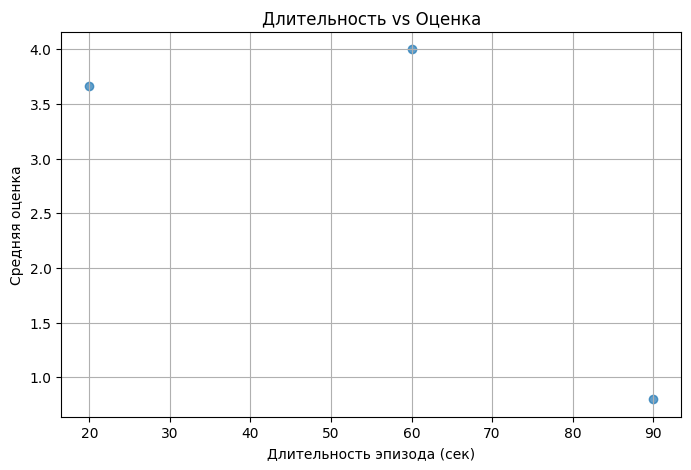

In [74]:
import pandas as pd
import numpy as np



# Преобразуем время в секунды
def time_to_seconds(t):
    if pd.isna(t) or t == "":
        return np.nan
    try:
        h, m, s = map(int, str(t).split(':'))
        return h * 3600 + m * 60 + s
    except:
        return np.nan

df['start_sec'] = df['start_ep'].apply(time_to_seconds)
df['end_sec'] = df['end_ep'].apply(time_to_seconds)
df['duration_sec'] = df['end_sec'] - df['start_sec']

# Средняя оценка за эпизод
def parse_scores_col(col):
    scores = []
    for r in col:
        if pd.notna(r) and str(r).strip() != "":
            try:
                scores.extend([float(x.strip()) for x in str(r).split(',') if x.strip() != ""])
            except:
                pass
    return np.mean(scores) if scores else 0

# Применяем к каждой строке (эпизоду)
episode_scores = []
for idx, row in df.iterrows():
    all_scores = []
    for col in ['results_1', 'results_2']:
        r = row[col]
        if pd.notna(r) and str(r).strip() != "":
            try:
                all_scores.extend([float(x.strip()) for x in str(r).split(',') if x.strip() != ""])
            except:
                pass
    episode_scores.append(np.mean(all_scores) if all_scores else np.nan)

df['episode_avg_score'] = episode_scores

# Корреляция
corr = df[['duration_sec', 'episode_avg_score']].corr().iloc[0, 1]
print(f"Корреляция длительности и оценки: {corr:.3f}")

# Визуализация
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.scatter(df['duration_sec'], df['episode_avg_score'], alpha=0.7)
plt.xlabel('Длительность эпизода (сек)')
plt.ylabel('Средняя оценка')
plt.title('Длительность vs Оценка')
plt.grid(True)
plt.show()

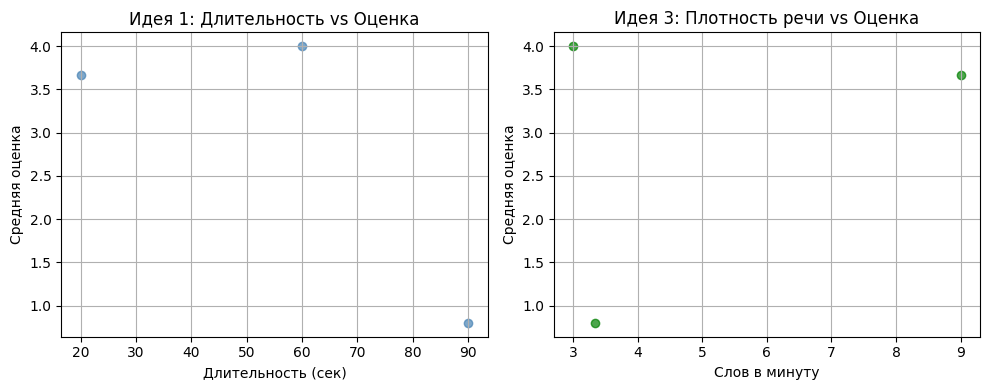

Статистика по валидным эпизодам:
Средняя длительность: 56.7 сек
Средняя плотность: 5.1 слов/мин
Корреляция длительности и оценки: -0.764
Корреляция плотности и оценки: 0.370


In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# Пример данных (замените на ваш df)
df = pd.DataFrame({
    'actions_1': ["апрпг,апрпг,алнбк", "привет,мир", "ок"],
    'actions_2': ["да,нет", "пока", "ладно,согласен"],
    'results_1': ["0,1,0", "5,4", "3"],
    'results_2': ["2,1", "2", "4,5"],
    'start_ep': ["04:48:00", "05:10:00", "06:00:00"],
    'end_ep': ["04:49:30", "05:10:20", "06:01:00"]
})

# 🔧 Надёжный парсер времени формата MM:SS:00 или MM:SS
def robust_time_to_sec(t):
    if pd.isna(t) or str(t).strip() == "":
        return np.nan
    s = str(t).strip()
    # Попробуем HH:MM:SS (на случай, если часы есть)
    match = re.search(r'(\d{1,2}):(\d{2}):(\d{2})', s)
    if match:
        h, m, s_val = map(int, match.groups())
        return h * 3600 + m * 60 + s_val
    # Попробуем MM:SS
    match = re.search(r'(\d{1,2}):(\d{2})', s)
    if match:
        m, s_val = map(int, match.groups())
        return m * 60 + s_val
    return np.nan

# Преобразуем время в секунды
df['start_sec'] = df['start_ep'].apply(robust_time_to_sec)
df['end_sec'] = df['end_ep'].apply(robust_time_to_sec)

# Рассчитываем длительность
df['duration_sec'] = df['end_sec'] - df['start_sec']

# Подсчёт слов
def count_words(text):
    if pd.isna(text) or str(text).strip() == "":
        return 0
    return len([w for w in str(text).split(',') if w.strip() != ""])

df['words_1'] = df['actions_1'].apply(count_words)
df['words_2'] = df['actions_2'].apply(count_words)
df['total_words'] = df['words_1'] + df['words_2']

# Средняя оценка за эпизод
def get_episode_avg_score(r1, r2):
    scores = []
    for r in [r1, r2]:
        if pd.notna(r) and str(r).strip() != "":
            try:
                scores.extend([float(x.strip()) for x in str(r).split(',') if x.strip() != ""])
            except:
                pass
    return np.mean(scores) if scores else np.nan

df['episode_avg_score'] = df.apply(lambda row: get_episode_avg_score(row['results_1'], row['results_2']), axis=1)

# 🔒 Фильтрация: только валидные и положительные длительности
valid_mask = (
    df['duration_sec'].notna() &
    df['episode_avg_score'].notna() &
    (df['duration_sec'] > 0)  # избегаем деления на 0 и отрицательных значений
)
df_clean = df[valid_mask].copy()

if df_clean.empty:
    print("Нет валидных данных для анализа.")
else:
    # Идея 1: Длительность vs Оценка
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.scatter(df_clean['duration_sec'], df_clean['episode_avg_score'], alpha=0.7, color='steelblue')
    plt.xlabel('Длительность (сек)')
    plt.ylabel('Средняя оценка')
    plt.title('Идея 1: Длительность vs Оценка')
    plt.grid(True)

    # Идея 3: Слова в минуту
    df_clean['words_per_min'] = df_clean['total_words'] / (df_clean['duration_sec'] / 60)

    plt.subplot(1, 2, 2)
    plt.scatter(df_clean['words_per_min'], df_clean['episode_avg_score'], alpha=0.7, color='green')
    plt.xlabel('Слов в минуту')
    plt.ylabel('Средняя оценка')
    plt.title('Идея 3: Плотность речи vs Оценка')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    # Вывод статистики
    print("Статистика по валидным эпизодам:")
    print(f"Средняя длительность: {df_clean['duration_sec'].mean():.1f} сек")
    print(f"Средняя плотность: {df_clean['words_per_min'].mean():.1f} слов/мин")
    print(f"Корреляция длительности и оценки: {df_clean['duration_sec'].corr(df_clean['episode_avg_score']):.3f}")
    print(f"Корреляция плотности и оценки: {df_clean['words_per_min'].corr(df_clean['episode_avg_score']):.3f}")

# Идея 3. Плотность речи: сколько реплик в минуту?
Насколько интенсивен диалог? Может, высокая плотность = стресс?

💡 Подход:
Считаем общее число слов или реплик в эпизоде.
Делим на длительность → реплики/сек или слова/мин.

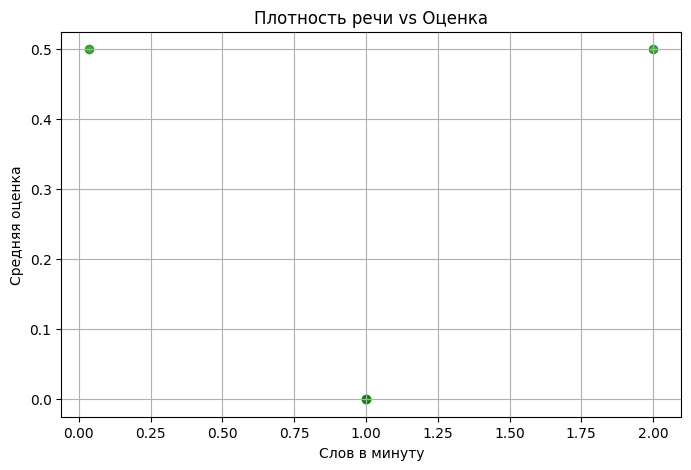

Средняя плотность: 1.0092592592592593


In [65]:
# Подсчёт числа слов в эпизоде
def count_words(text):
    if pd.isna(text) or str(text).strip() == "":
        return 0
    return len([w for w in str(text).split(',') if w.strip() != ""])

df['words_1'] = df['actions_1'].apply(count_words)
df['words_2'] = df['actions_2'].apply(count_words)
df['total_words'] = df['words_1'] + df['words_2']

# Плотность: слова в минуту
df['words_per_min'] = df['total_words'] / (df['duration_sec'] / 60)
df['words_per_min'] = df['words_per_min'].replace([np.inf, -np.inf], np.nan)

# Связь с оценкой
plt.figure(figsize=(8,5))
plt.scatter(df['words_per_min'], df['episode_avg_score'], alpha=0.7, color='green')
plt.xlabel('Слов в минуту')
plt.ylabel('Средняя оценка')
plt.title('Плотность речи vs Оценка')
plt.grid(True)
plt.show()

print("Средняя плотность:", df['words_per_min'].mean())

# Идея 4. Динамика в рамках эпизода: "разогрев" или "усталость"?
Оценки падают к концу эпизода? Или наоборот — диалог "раскачивается"?

💡 Подход:
Считаем позицию реплики внутри эпизода (1-я, 2-я, ...).
Строим scatter: позиция → оценка.
Для этого нужно распаковать данные в длинный формат.

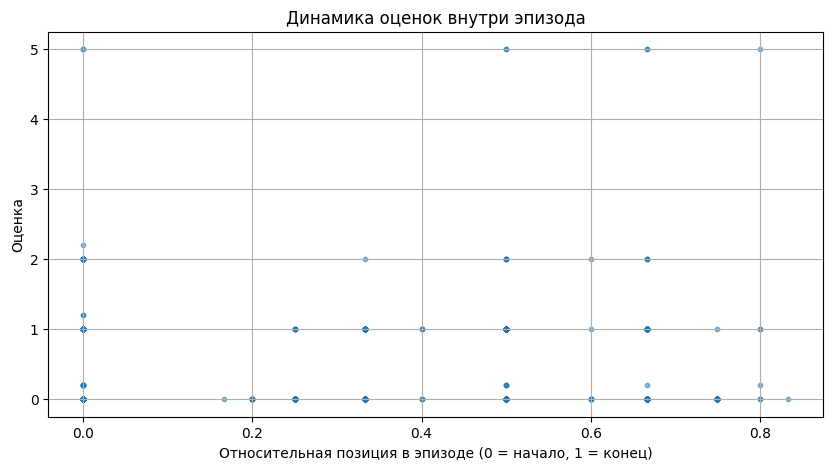

/tmp/ipython-input-2143733332.py:53: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



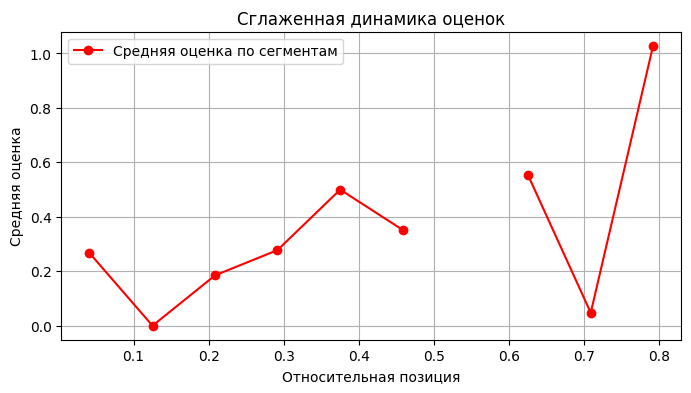

In [59]:
# Создаём длинный формат: каждая реплика — отдельная строка
records = []
for idx, row in df.iterrows():
    ep_id = idx
    start = row['start_sec']
    duration = row['duration_sec']

    for side in ['1', '2']:
        actions = row[f'actions_{side}']
        results = row[f'results_{side}']

        if pd.isna(actions) or str(actions).strip() == "":
            continue

        tokens = [t.strip() for t in str(actions).split(',') if t.strip() != ""]
        try:
            scores = [float(x.strip()) for x in str(results).split(',') if x.strip() != ""] if pd.notna(results) else [0]*len(tokens)
        except:
            scores = [0]*len(tokens)

        # Выравнивание
        if len(scores) < len(tokens):
            scores += [0] * (len(tokens) - len(scores))
        else:
            scores = scores[:len(tokens)]

        # Для каждой реплики — позиция и нормализованное время
        for i, (tok, scr) in enumerate(zip(tokens, scores)):
            rel_time = i / len(tokens) if len(tokens) > 0 else 0  # 0..1
            abs_time = start + (duration * rel_time) if pd.notna(duration) and pd.notna(start) else np.nan
            records.append({
                'episode_id': ep_id,
                'position': i + 1,
                'relative_position': rel_time,
                'token': tok,
                'score': scr,
                'absolute_time_sec': abs_time
            })

long_df = pd.DataFrame(records)

# Визуализация: оценка vs относительная позиция
plt.figure(figsize=(10,5))
plt.scatter(long_df['relative_position'], long_df['score'], alpha=0.5, s=10)
plt.xlabel('Относительная позиция в эпизоде (0 = начало, 1 = конец)')
plt.ylabel('Оценка')
plt.title('Динамика оценок внутри эпизода')
plt.grid(True)
plt.show()

# Сглаженное среднее
long_df['bin'] = pd.cut(long_df['relative_position'], bins=10)
bin_means = long_df.groupby('bin')['score'].mean()
bin_centers = [(b.left + b.right)/2 for b in bin_means.index]

plt.figure(figsize=(8,4))
plt.plot(bin_centers, bin_means.values, 'ro-', label='Средняя оценка по сегментам')
plt.xlabel('Относительная позиция')
plt.ylabel('Средняя оценка')
plt.title('Сглаженная динамика оценок')
plt.grid(True)
plt.legend()
plt.show()

# Идея 5. Интервал между эпизодами → "остывание" или "нагрев"?
Если эпизоды идут подряд — как пауза между ними влияет на оценку следующего?

💡 Подход:
Сортируем по start_sec.
Считаем gap = start_ep[i] - end_ep[i-1].
Анализируем: короткий перерыв → выше оценка?

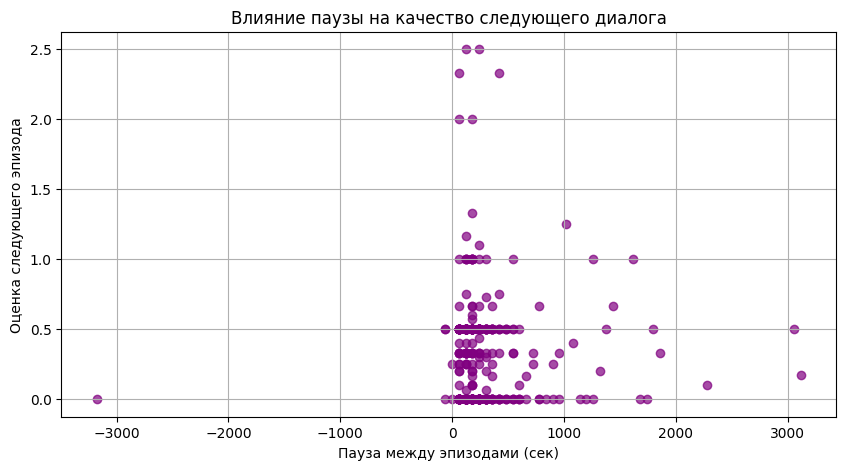

Корреляция паузы и оценки: 0.011603969903435788


In [60]:
# Сортируем по времени начала
df_sorted = df.sort_values('start_sec').reset_index(drop=True)

# Вычисляем паузу между эпизодами
df_sorted['prev_end'] = df_sorted['end_sec'].shift(1)
df_sorted['gap_sec'] = df_sorted['start_sec'] - df_sorted['prev_end']

# Убираем первую строку (нет предыдущего)
df_gaps = df_sorted.dropna(subset=['gap_sec']).copy()

if len(df_gaps) > 0:
    plt.figure(figsize=(10,5))
    plt.scatter(df_gaps['gap_sec'], df_gaps['episode_avg_score'], alpha=0.7, color='purple')
    plt.xlabel('Пауза между эпизодами (сек)')
    plt.ylabel('Оценка следующего эпизода')
    plt.title('Влияние паузы на качество следующего диалога')
    plt.grid(True)
    plt.show()

    print("Корреляция паузы и оценки:", df_gaps[['gap_sec', 'episode_avg_score']].corr().iloc[0,1])
else:
    print("Недостаточно последовательных эпизодов для анализа пауз.")